In [4]:
import math
import collections
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
pd.options.display.max_rows = 10

In [6]:
path = os.getcwd() + '\\annual_gas_transmission_gathering_2010_present'
files = os.listdir(path)

In [7]:
files_xlsx = [f for f in files if f.startswith('annual')]


In [8]:
gas_trans = []

for f in files_xlsx:
    data = pd.read_excel('annual_gas_transmission_gathering_2010_present\\' + f, sheet_name=None,header=2)
    gas_trans.append(data)


In [41]:
#List of all annual gas tranmission and gathering (dictionary)
gas_trans

[{'GT AR Part A to D':           DATAFILE_AS_OF  REPORT_YEAR  REPORT_NUMBER  SUPPLEMENTAL_NUMBER  \
  0    2021-12-01 11:28:36         2010       20110198                22215   
  1    2021-12-01 11:28:36         2010       20110759                22823   
  2    2021-12-01 11:28:36         2010       20110934                24213   
  3    2021-12-01 11:28:36         2010       20110595                22700   
  4    2021-12-01 11:28:36         2010       20110593                24212   
  ...                  ...          ...            ...                  ...   
  1085 2021-12-01 11:28:36         2010       20130853                26909   
  1086 2021-12-01 11:28:36         2010       20131185                27410   
  1087 2021-12-01 11:28:36         2010       20131167                27368   
  1088 2021-12-01 11:28:36         2010       20110089                22096   
  1089 2021-12-01 11:28:36         2010       20110032                22034   
  
        OPERATOR_ID         

In [43]:
len(gas_trans)

11

In [45]:
gas_trans[10].keys()

dict_keys(['GT AR Part A to D', 'GT AR Part F to G', 'GT AR Part H', 'GT AR Part I', 'GT AR Part J', 'GT AR Part K', 'GT AR Part L', 'GT AR Part M', 'GT AR Part N to O', 'GT AR Part P', 'GT AR Part Q', 'GT AR Part R'])

In [11]:
gas_trans[10]['GT AR Part A to D']

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTDCITOTAL,PARTDWITOTAL,PARTDPTOTAL,PARTDCTOTAL,PARTDOTOTAL,PARTDTOTALMILES,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
0,2021-12-01 13:45:53,2020,20211098,39417,3,ACADIAN GAS PIPELINE SYSTEM,1100 LOUISIANA ST.,HOUSTON,TX,77002,...,0,0.0,0.00,0.0,0.0,1293.433,INITIAL,2021-03-14 22:50:14,2021-03-14 22:50:14,7100.2-1 (Rev. 10-2014)
1,2021-12-01 13:45:53,2020,20211311,39644,117,AIR PRODUCTS & CHEMICALS INC,7201 HAMILTON BLVD.,ALLENTOWN,PA,18195-1501,...,0,0.0,0.00,0.0,0.0,547.340,INITIAL,2021-03-22 11:10:19,2021-03-22 11:10:19,7100.2-1 (Rev. 10-2014)
2,2021-12-01 13:45:53,2020,20211305,39638,117,AIR PRODUCTS & CHEMICALS INC,7201 HAMILTON BLVD.,ALLENTOWN,PA,18195-1501,...,0,0.0,0.00,0.0,0.0,89.890,INITIAL,2021-03-18 15:21:14,2021-03-18 15:21:14,7100.2-1 (Rev. 10-2014)
3,2021-12-01 13:45:53,2020,20211294,39622,117,AIR PRODUCTS & CHEMICALS INC,7201 HAMILTON BLVD.,ALLENTOWN,PA,18195-1501,...,0,0.0,0.00,0.0,0.0,9.990,INITIAL,2021-03-17 10:46:35,2021-03-17 10:46:35,7100.2-1 (Rev. 10-2014)
4,2021-12-01 13:45:53,2020,20211306,39639,117,AIR PRODUCTS & CHEMICALS INC,7201 HAMILTON BLVD.,ALLENTOWN,PA,18195-1501,...,0,0.0,0.00,0.0,0.0,22.110,INITIAL,2021-03-18 15:22:36,2021-03-18 15:22:36,7100.2-1 (Rev. 10-2014)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,2021-12-01 13:45:53,2020,20211375,39750,40237,"SHERIDAN PRODUCTION COMPANY III, LLC","1360 POST OAK BLVD, SUITE 2500",HOUSTON,TX,77056,...,0,0.0,0.00,0.0,0.0,12.598,INITIAL,2021-05-19 14:25:29,2021-05-19 14:25:29,7100.2-1 (Rev. 10-2014)
1370,2021-12-01 13:45:53,2020,20211377,39768,40245,ANADARKO E&P ONSHORE LLC,1099 18TH STREET SUITE 1800,DENVER,CO,80202,...,0,0.0,4.41,0.0,0.0,5.210,INITIAL,2021-06-15 11:09:48,2021-06-15 11:09:48,7100.2-1 (Rev. 10-2014)
1371,2021-12-01 13:45:53,2020,20211378,39769,40248,KERR-MCGEE OIL & GAS ONSHORE LP,1099 18TH STREET SUITE 1800,DENVER,CO,80202,...,0,0.0,10.38,0.0,0.0,14.710,INITIAL,2021-06-15 11:24:58,2021-06-15 11:24:58,7100.2-1 (Rev. 10-2014)
1372,2021-12-01 13:45:53,2020,20211391,39802,40288,"POLARIS PIPELINE SYSTEMS, LLC",3698 RANCH ROAD 620 SOUTH SUITE 113,AUSTIN,TX,78738,...,0,0.0,0.00,0.0,0.0,1.470,INITIAL,2021-10-15 11:47:43,2021-10-15 11:47:43,7100.2-1 (Rev. 10-2014)


In [10]:
a = set(gas_trans[10]['GT AR Part A to D'].loc[:, 'PARTA5COMMODITY'])
commodity_type = [item for item in a if not item.startswith('Other')]
commodity_type.append('Other')

commodity_type

['Landfill Gas',
 'Natural Gas',
 'Synthetic Gas',
 'Hydrogen Gas',
 'Propane Gas',
 'Other']

In [12]:
#easier way to above instead of using set
gas_trans[10]['GT AR Part A to D']['PARTA5COMMODITY'].unique()

array(['Natural Gas', 'Hydrogen Gas', 'Other Gas-Carbon Monoxide',
       'Other Gas-Fuel Gas', 'Synthetic Gas', 'Landfill Gas',
       'Other Gas-Ethylene', 'Other Gas-Chlorine', 'Other Gas-Dry Gas',
       'Other Gas-Acetylene', 'Other Gas-Propylene Off Gas',
       'Other Gas-Ethylene Gas', 'Other Gas-Anhydrous HCL',
       'Other Gas-Off Gas', 'Other Gas-Residual Gas', 'Other Gas-Methane',
       'Other Gas-Ethane', 'Other Gas-Offgas', 'Propane Gas',
       'Other Gas-CO, H2, N2', 'Other Gas-Bio-Gas',
       'Other Gas-Hydrogen Chloride Gas',
       'Other Gas-Processed Landfill Gas',
       'Other Gas-AHCL Anhydrous Hydrogen Chloride',
       'Other Gas-Processed Coalbed Methane',
       'Other Gas-Processed Landfill Methane', 'Other Gas-ethylene',
       'Other Gas-Refinery Gas', 'Other Gas-COKE OVEN GAS'], dtype=object)

In [13]:
total_km_yearly = {}
pipe_coating = {}
pipe_material = {}

for i in range(0, len(gas_trans)):
    total = gas_trans[i]['GT AR Part A to D']['PARTDTONTOTAL'].sum()*1.60934
    total_km_yearly[2010+i]= round(total)
    
    cpb = round(gas_trans[i]['GT AR Part A to D']['PARTDTONCPB'].sum()*1.60934)
    cpc = round(gas_trans[i]['GT AR Part A to D']['PARTDTONCPC'].sum()*1.60934)
    cub = round(gas_trans[i]['GT AR Part A to D']['PARTDTONCUB'].sum()*1.60934)
    cuc = round(gas_trans[i]['GT AR Part A to D']['PARTDTONCUC'].sum()*1.60934)
    pipe_coating[2010+i]= {'cpb':cpb, 'cpc': cpc, 'cub': cub, 'cuc': cuc}
    
    steel = cpb + cpc + cub + cuc
    cast_iron = round(gas_trans[i]['GT AR Part A to D']['PARTDTONCI'].sum()*1.60934)
    wrought_iron = round(gas_trans[i]['GT AR Part A to D']['PARTDTONWI'].sum()*1.60934)
    plastic = round(gas_trans[i]['GT AR Part A to D']['PARTDTONP'].sum()*1.60934)
    composite = round(gas_trans[i]['GT AR Part A to D']['PARTDTONC'].sum()*1.60934)
    other = round(gas_trans[i]['GT AR Part A to D']['PARTDTONO'].sum()*1.60934)
    
    pipe_material[2010+i] = {'Steel': steel, 'Cast Iron': cast_iron, 'Wrought Iron': wrought_iron, 'Plastic': plastic, 'Composite': composite, 'Other': other}

total_km_yearly

{2010: 471571,
 2011: 471068,
 2012: 480505,
 2013: 480191,
 2014: 479426,
 2015: 478540,
 2016: 478070,
 2017: 478908,
 2018: 480433,
 2019: 481048,
 2020: 480874}

In [418]:
pipe_coating

{2010: {'cpb': 10414, 'cpc': 456187, 'cub': 1976, 'cuc': 649},
 2011: {'cpb': 13069, 'cpc': 453462, 'cub': 1820, 'cuc': 226},
 2012: {'cpb': 9620, 'cpc': 465977, 'cub': 1675, 'cuc': 941},
 2013: {'cpb': 9184, 'cpc': 466371, 'cub': 1353, 'cuc': 873},
 2014: {'cpb': 7901, 'cpc': 466951, 'cub': 1208, 'cuc': 903},
 2015: {'cpb': 7395, 'cpc': 466696, 'cub': 1122, 'cuc': 816},
 2016: {'cpb': 6929, 'cpc': 467249, 'cub': 1002, 'cuc': 378},
 2017: {'cpb': 6451, 'cpc': 468584, 'cub': 974, 'cuc': 339},
 2018: {'cpb': 6224, 'cpc': 470574, 'cub': 851, 'cuc': 303},
 2019: {'cpb': 5658, 'cpc': 471753, 'cub': 673, 'cuc': 426},
 2020: {'cpb': 4986, 'cpc': 472433, 'cub': 654, 'cuc': 282}}

In [68]:
pipe_material

{2010: {'Steel': 478991,
  'Cast Iron': 29,
  'Wrought Iron': 102,
  'Plastic': 2103,
  'Composite': 0,
  'Other': 112},
 2011: {'Steel': 481420,
  'Cast Iron': 0,
  'Wrought Iron': 95,
  'Plastic': 2300,
  'Composite': 0,
  'Other': 96},
 2012: {'Steel': 486892,
  'Cast Iron': 0,
  'Wrought Iron': 98,
  'Plastic': 2086,
  'Composite': 5,
  'Other': 104},
 2013: {'Steel': 486092,
  'Cast Iron': 0,
  'Wrought Iron': 91,
  'Plastic': 2196,
  'Composite': 19,
  'Other': 104},
 2014: {'Steel': 483961,
  'Cast Iron': 0,
  'Wrought Iron': 91,
  'Plastic': 2262,
  'Composite': 15,
  'Other': 95},
 2015: {'Steel': 482608,
  'Cast Iron': 0,
  'Wrought Iron': 62,
  'Plastic': 2338,
  'Composite': 15,
  'Other': 96},
 2016: {'Steel': 482109,
  'Cast Iron': 0,
  'Wrought Iron': 59,
  'Plastic': 2340,
  'Composite': 15,
  'Other': 98},
 2017: {'Steel': 482460,
  'Cast Iron': 0,
  'Wrought Iron': 38,
  'Plastic': 2400,
  'Composite': 15,
  'Other': 107},
 2018: {'Steel': 483873,
  'Cast Iron': 0,
  

In [14]:
pipe_commodity = {}

for i in range(0, len(gas_trans)):
    pipe_commodity[2010+i]={}
    for commodity in commodity_type:
        km = round(gas_trans[i]['GT AR Part A to D'][gas_trans[i]['GT AR Part A to D'].PARTA5COMMODITY.str.contains(commodity)]['PARTDTONTOTAL'].sum()*1.60934)
        pipe_commodity[2010+i][commodity] = km

pipe_commodity

{2010: {'Landfill Gas': 153,
  'Natural Gas': 467135,
  'Synthetic Gas': 286,
  'Hydrogen Gas': 2169,
  'Propane Gas': 0,
  'Other': 1982},
 2011: {'Landfill Gas': 170,
  'Natural Gas': 466639,
  'Synthetic Gas': 319,
  'Hydrogen Gas': 2144,
  'Propane Gas': 0,
  'Other': 1950},
 2012: {'Landfill Gas': 473,
  'Natural Gas': 475766,
  'Synthetic Gas': 157,
  'Hydrogen Gas': 2409,
  'Propane Gas': 0,
  'Other': 1731},
 2013: {'Landfill Gas': 528,
  'Natural Gas': 475239,
  'Synthetic Gas': 146,
  'Hydrogen Gas': 2473,
  'Propane Gas': 0,
  'Other': 1909},
 2014: {'Landfill Gas': 555,
  'Natural Gas': 474374,
  'Synthetic Gas': 207,
  'Hydrogen Gas': 2487,
  'Propane Gas': 0,
  'Other': 2034},
 2015: {'Landfill Gas': 566,
  'Natural Gas': 473468,
  'Synthetic Gas': 207,
  'Hydrogen Gas': 2497,
  'Propane Gas': 0,
  'Other': 1995},
 2016: {'Landfill Gas': 582,
  'Natural Gas': 472908,
  'Synthetic Gas': 207,
  'Hydrogen Gas': 2570,
  'Propane Gas': 0,
  'Other': 1993},
 2017: {'Landfill Ga

In [116]:
gas_trans[10]['GT AR Part H']

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA5COMMODITY,INTER_INTRA,STATE_NAME,PARTHON4LESS,...,PARTHOFF46,PARTHOFF48,PARTHOFF50,PARTHOFF52,PARTHOFF54,PARTHOFF56,PARTHOFF58OVER,PARTHOFF_OTHER_PIPE_DETAIL,PARTHOFF_OTHER_PIPE_MILE_TOTAL,PARTHOFFTOTAL
0,2021-12-01 13:49:05,2020,20211098,39417,3,ACADIAN GAS PIPELINE SYSTEM,Natural Gas,INTRASTATE,LOUISIANA,57.957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1,2021-12-01 13:49:05,2020,20211311,39644,117,AIR PRODUCTS & CHEMICALS INC,Hydrogen Gas,INTERSTATE,LOUISIANA,5.680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2,2021-12-01 13:49:05,2020,20211311,39644,117,AIR PRODUCTS & CHEMICALS INC,Hydrogen Gas,INTERSTATE,TEXAS,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
3,2021-12-01 13:49:05,2020,20211311,39644,117,AIR PRODUCTS & CHEMICALS INC,Hydrogen Gas,INTRASTATE,CALIFORNIA,2.880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
4,2021-12-01 13:49:05,2020,20211311,39644,117,AIR PRODUCTS & CHEMICALS INC,Hydrogen Gas,INTRASTATE,OHIO,1.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,2021-12-01 13:49:05,2020,20210139,38380,40218,RENOVAR SHREVEPORT LLC.,Landfill Gas,INTRASTATE,LOUISIANA,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1651,2021-12-01 13:49:05,2020,20211117,39436,40223,"CRANBERRY CREEK LANDFILL, LLC",Landfill Gas,INTRASTATE,WISCONSIN,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1652,2021-12-01 13:49:05,2020,20211014,39327,40228,SIMCOE LLC,Natural Gas,INTRASTATE,COLORADO,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1653,2021-12-01 13:49:05,2020,20211375,39750,40237,"SHERIDAN PRODUCTION COMPANY III, LLC",Natural Gas,INTRASTATE,TEXAS,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [15]:
pipe_size_cat = [size for size in list(gas_trans[10]['GT AR Part H'].columns) if (size.startswith('PARTHON') and size != 'PARTHON_OTHER_PIPE_DETAIL')]
pipe_size_cat

['PARTHON4LESS',
 'PARTHON6',
 'PARTHON8',
 'PARTHON10',
 'PARTHON12',
 'PARTHON14',
 'PARTHON16',
 'PARTHON18',
 'PARTHON20',
 'PARTHON22',
 'PARTHON24',
 'PARTHON26',
 'PARTHON28',
 'PARTHON30',
 'PARTHON32',
 'PARTHON34',
 'PARTHON36',
 'PARTHON38',
 'PARTHON40',
 'PARTHON42',
 'PARTHON44',
 'PARTHON46',
 'PARTHON48',
 'PARTHON50',
 'PARTHON52',
 'PARTHON54',
 'PARTHON56',
 'PARTHON58OVER',
 'PARTHON_OTHER_PIPE_MILE_TOTAL',
 'PARTHONTOTAL']

In [16]:
pipe_diameter = {}

for i in range(0, len(gas_trans)):
    pipe_diameter[2010+i]={}
    for size in pipe_size_cat:
        km = round(gas_trans[i]['GT AR Part H'][size].sum()*1.60934)
        pipe_diameter[2010+i][size] = km

pipe_diameter

{2010: {'PARTHON4LESS': 37251,
  'PARTHON6': 36564,
  'PARTHON8': 41558,
  'PARTHON10': 26793,
  'PARTHON12': 42764,
  'PARTHON14': 4240,
  'PARTHON16': 41812,
  'PARTHON18': 7945,
  'PARTHON20': 39846,
  'PARTHON22': 8416,
  'PARTHON24': 47469,
  'PARTHON26': 21840,
  'PARTHON28': 2417,
  'PARTHON30': 64898,
  'PARTHON32': 31,
  'PARTHON34': 3038,
  'PARTHON36': 39784,
  'PARTHON38': 0,
  'PARTHON40': 10,
  'PARTHON42': 13267,
  'PARTHON44': 0,
  'PARTHON46': 0,
  'PARTHON48': 121,
  'PARTHON50': 0,
  'PARTHON52': 0,
  'PARTHON54': 0,
  'PARTHON56': 3,
  'PARTHON58OVER': 0,
  'PARTHON_OTHER_PIPE_MILE_TOTAL': 1720,
  'PARTHONTOTAL': 481789},
 2011: {'PARTHON4LESS': 36341,
  'PARTHON6': 36367,
  'PARTHON8': 40726,
  'PARTHON10': 27020,
  'PARTHON12': 43963,
  'PARTHON14': 4104,
  'PARTHON16': 38422,
  'PARTHON18': 7739,
  'PARTHON20': 41182,
  'PARTHON22': 8043,
  'PARTHON24': 47748,
  'PARTHON26': 21804,
  'PARTHON28': 2,
  'PARTHON30': 68246,
  'PARTHON32': 31,
  'PARTHON34': 3038,
  

In [17]:
pipe_install_cat = [year for year in list(gas_trans[10]['GT AR Part J'].columns) if year.startswith('PARTJTON')]
pipe_install_cat

['PARTJTONUNKWN',
 'PARTJTONPRE1940',
 'PARTJTON194049',
 'PARTJTON195059',
 'PARTJTON196069',
 'PARTJTON197079',
 'PARTJTON198089',
 'PARTJTON199099',
 'PARTJTON200009',
 'PARTJTON201019',
 'PARTJTON202029',
 'PARTJTONTOTAL']

In [18]:
pipe_installation = {}

for i in range(0, len(gas_trans)):
    pipe_installation[2010+i]={}
    for year in pipe_install_cat:
        km = round(gas_trans[i]['GT AR Part J'][year].sum()*1.60934)
        pipe_installation[2010+i][year] = km

pipe_installation

{2010: {'PARTJTONUNKWN': 27729,
  'PARTJTONPRE1940': 0,
  'PARTJTON194049': 36457,
  'PARTJTON195059': 112185,
  'PARTJTON196069': 114933,
  'PARTJTON197079': 48446,
  'PARTJTON198089': 42089,
  'PARTJTON199099': 50353,
  'PARTJTON200009': 46384,
  'PARTJTON201019': 3201,
  'PARTJTON202029': 0,
  'PARTJTONTOTAL': 481776},
 2011: {'PARTJTONUNKWN': 24046,
  'PARTJTONPRE1940': 0,
  'PARTJTON194049': 36325,
  'PARTJTON195059': 112075,
  'PARTJTON196069': 114620,
  'PARTJTON197079': 49003,
  'PARTJTON198089': 41519,
  'PARTJTON199099': 49878,
  'PARTJTON200009': 46847,
  'PARTJTON201019': 8072,
  'PARTJTON202029': 0,
  'PARTJTONTOTAL': 482385},
 2012: {'PARTJTONUNKWN': 6973,
  'PARTJTONPRE1940': 16325,
  'PARTJTON194049': 35472,
  'PARTJTON195059': 110585,
  'PARTJTON196069': 114570,
  'PARTJTON197079': 48332,
  'PARTJTON198089': 40930,
  'PARTJTON199099': 48675,
  'PARTJTON200009': 47643,
  'PARTJTON201019': 11081,
  'PARTJTON202029': 0,
  'PARTJTONTOTAL': 480587},
 2013: {'PARTJTONUNKWN':

In [19]:
pipe_smys_cat = [smys for smys in list(gas_trans[10]['GT AR Part K'].columns) if smys.startswith('PARTK')]
pipe_smys_cat_tot = [smys for smys in pipe_smys_cat[:55] if smys.endswith('TOT')][:10]

pipe_smys_cat_tot

['PARTK20LESSTOT',
 'PARTK2029TOT',
 'PARTK3040TOT',
 'PARTK4150TOT',
 'PARTK5160TOT',
 'PARTK6172TOT',
 'PARTK7380TOT',
 'PARTK80MORETOT',
 'PARTKUNKNOWNTOT',
 'PARTKNONSTEELTOT']

In [20]:
pipe_smys_cat_on = [smys for smys in pipe_smys_cat[:55] if not (smys.endswith('TOT') or smys.endswith('TAL'))]
pipe_smys_cat_on

['PARTK20LESSC1',
 'PARTK20LESSC2',
 'PARTK20LESSC3',
 'PARTK20LESSC4',
 'PARTK2029C1',
 'PARTK2029C2',
 'PARTK2029C3',
 'PARTK2029C4',
 'PARTK3040C1',
 'PARTK3040C2',
 'PARTK3040C3',
 'PARTK3040C4',
 'PARTK4150C1',
 'PARTK4150C2',
 'PARTK4150C3',
 'PARTK4150C4',
 'PARTK5160C1',
 'PARTK5160C2',
 'PARTK5160C3',
 'PARTK5160C4',
 'PARTK6172C1',
 'PARTK6172C2',
 'PARTK6172C3',
 'PARTK6172C4',
 'PARTK7380C1',
 'PARTK7380C2',
 'PARTK7380C3',
 'PARTK7380C4',
 'PARTK80MOREC1',
 'PARTK80MOREC2',
 'PARTK80MOREC3',
 'PARTK80MOREC4',
 'PARTKUNKNOWNC1',
 'PARTKUNKNOWNC2',
 'PARTKUNKNOWNC3',
 'PARTKUNKNOWNC4',
 'PARTKNONSTEELC1',
 'PARTKNONSTEELC2',
 'PARTKNONSTEELC3',
 'PARTKNONSTEELC4']

In [21]:
pipe_smys = {}

for i in range(0, len(gas_trans)):
    pipe_smys[2010+i]={}
    for smys in pipe_smys_cat_tot:
        km = round(gas_trans[i]['GT AR Part K'][smys].sum()*1.60934)
        pipe_smys[2010+i][smys] = km

pipe_smys

{2010: {'PARTK20LESSTOT': 33445,
  'PARTK2029TOT': 43655,
  'PARTK3040TOT': 50732,
  'PARTK4150TOT': 71730,
  'PARTK5160TOT': 70622,
  'PARTK6172TOT': 173937,
  'PARTK7380TOT': 17853,
  'PARTK80MORETOT': 2530,
  'PARTKUNKNOWNTOT': 11078,
  'PARTKNONSTEELTOT': 1910},
 2011: {'PARTK20LESSTOT': 30952,
  'PARTK2029TOT': 44219,
  'PARTK3040TOT': 51296,
  'PARTK4150TOT': 71113,
  'PARTK5160TOT': 73031,
  'PARTK6172TOT': 179986,
  'PARTK7380TOT': 18803,
  'PARTK80MORETOT': 2229,
  'PARTKUNKNOWNTOT': 8925,
  'PARTKNONSTEELTOT': 1817},
 2012: {'PARTK20LESSTOT': 30919,
  'PARTK2029TOT': 46427,
  'PARTK3040TOT': 51957,
  'PARTK4150TOT': 74203,
  'PARTK5160TOT': 74338,
  'PARTK6172TOT': 167647,
  'PARTK7380TOT': 19157,
  'PARTK80MORETOT': 2099,
  'PARTKUNKNOWNTOT': 11695,
  'PARTKNONSTEELTOT': 2134},
 2013: {'PARTK20LESSTOT': 30330,
  'PARTK2029TOT': 45926,
  'PARTK3040TOT': 51145,
  'PARTK4150TOT': 75650,
  'PARTK5160TOT': 75317,
  'PARTK6172TOT': 169461,
  'PARTK7380TOT': 19247,
  'PARTK80MORETO

In [22]:
pipe_smys_class = {}

for i in range(0, len(gas_trans)):
    pipe_smys_class[2010+i]={}
    for smys in pipe_smys_cat_on:
        km = round(gas_trans[i]['GT AR Part K'][smys].sum()*1.60934)
        pipe_smys_class[2010+i][smys] = km

pipe_smys_class

{2010: {'PARTK20LESSC1': 23798,
  'PARTK20LESSC2': 4203,
  'PARTK20LESSC3': 5391,
  'PARTK20LESSC4': 53,
  'PARTK2029C1': 24870,
  'PARTK2029C2': 6598,
  'PARTK2029C3': 11188,
  'PARTK2029C4': 1000,
  'PARTK3040C1': 31414,
  'PARTK3040C2': 6584,
  'PARTK3040C3': 11739,
  'PARTK3040C4': 994,
  'PARTK4150C1': 44477,
  'PARTK4150C2': 9332,
  'PARTK4150C3': 17815,
  'PARTK4150C4': 105,
  'PARTK5160C1': 54232,
  'PARTK5160C2': 10112,
  'PARTK5160C3': 6271,
  'PARTK5160C4': 7,
  'PARTK6172C1': 163576,
  'PARTK6172C2': 9471,
  'PARTK6172C3': 890,
  'PARTK6172C4': 1,
  'PARTK7380C1': 17539,
  'PARTK7380C2': 247,
  'PARTK7380C3': 38,
  'PARTK7380C4': 29,
  'PARTK80MOREC1': 2365,
  'PARTK80MOREC2': 60,
  'PARTK80MOREC3': 106,
  'PARTK80MOREC4': 0,
  'PARTKUNKNOWNC1': 8784,
  'PARTKUNKNOWNC2': 1069,
  'PARTKUNKNOWNC3': 1209,
  'PARTKUNKNOWNC4': 16,
  'PARTKNONSTEELC1': 996,
  'PARTKNONSTEELC2': 687,
  'PARTKNONSTEELC3': 224,
  'PARTKNONSTEELC4': 3},
 2011: {'PARTK20LESSC1': 21561,
  'PARTK20LESSC

In [ ]:
#I may need to look at smys for each class. To be revisited once incident data is review
#pipe_smys_cat_class = [smys for smys in pipe_smys_cat[:55] if not smys.endswith('TOT')]
#pipe_smys_cat_class

In [23]:
pipe_class_cat = [item for item in list(gas_trans[10]['GT AR Part L'].columns) if item.startswith('PARTLTON')][:4]
pipe_class_cat

['PARTLTONC1', 'PARTLTONC2', 'PARTLTONC3', 'PARTLTONC4']

In [24]:
pipe_class = {}

for i in range(0, len(gas_trans)):
    pipe_class[2010+i]={}
    for item in pipe_class_cat:
        km = round(gas_trans[i]['GT AR Part L'][item].sum()*1.60934)
        pipe_class[2010+i][item] = km

pipe_class

{2010: {'PARTLTONC1': 376657,
  'PARTLTONC2': 48585,
  'PARTLTONC3': 54531,
  'PARTLTONC4': 2197},
 2011: {'PARTLTONC1': 377386,
  'PARTLTONC2': 48265,
  'PARTLTONC3': 54590,
  'PARTLTONC4': 2214},
 2012: {'PARTLTONC1': 376927,
  'PARTLTONC2': 49259,
  'PARTLTONC3': 52809,
  'PARTLTONC4': 1546},
 2013: {'PARTLTONC1': 375637,
  'PARTLTONC2': 49130,
  'PARTLTONC3': 53902,
  'PARTLTONC4': 1533},
 2014: {'PARTLTONC1': 374460,
  'PARTLTONC2': 49313,
  'PARTLTONC3': 54166,
  'PARTLTONC4': 1461},
 2015: {'PARTLTONC1': 373807,
  'PARTLTONC2': 48360,
  'PARTLTONC3': 54822,
  'PARTLTONC4': 1519},
 2016: {'PARTLTONC1': 373791,
  'PARTLTONC2': 48284,
  'PARTLTONC3': 54482,
  'PARTLTONC4': 1492},
 2017: {'PARTLTONC1': 374624,
  'PARTLTONC2': 48807,
  'PARTLTONC3': 53976,
  'PARTLTONC4': 1500},
 2018: {'PARTLTONC1': 376532,
  'PARTLTONC2': 48326,
  'PARTLTONC3': 54035,
  'PARTLTONC4': 1350},
 2019: {'PARTLTONC1': 376892,
  'PARTLTONC2': 48698,
  'PARTLTONC3': 54096,
  'PARTLTONC4': 1358},
 2020: {'P

In [25]:
df_km = pd.DataFrame(total_km_yearly.values(), index = total_km_yearly.keys(), columns = ['Total_km'])
df_coating = pd.DataFrame.from_dict(pipe_coating, orient = 'index')
df_material = pd.DataFrame.from_dict(pipe_material, orient = 'index')
df_commodity = pd.DataFrame.from_dict(pipe_commodity, orient = 'index')
df_diameter = pd.DataFrame.from_dict(pipe_diameter, orient = 'index')
df_installation = pd.DataFrame.from_dict(pipe_installation, orient = 'index')
df_smys = pd.DataFrame.from_dict(pipe_smys, orient = 'index')
df_class = pd.DataFrame.from_dict(pipe_class, orient = 'index')


In [26]:
df_smys_class = pd.DataFrame.from_dict(pipe_smys_class, orient = 'index')

In [27]:
df_diameter_short = pd.DataFrame()
df_diameter_short['d<=4'] = df_diameter['PARTHON4LESS']
df_diameter_short['4<d<=10'] = df_diameter['PARTHON6'] + df_diameter['PARTHON8'] + df_diameter['PARTHON10']
df_diameter_short['10<d<=20'] = df_diameter['PARTHON12'] + df_diameter['PARTHON14'] + df_diameter['PARTHON16'] + df_diameter['PARTHON18']+ df_diameter['PARTHON20']
df_diameter_short['20<d<=28'] = df_diameter['PARTHON22'] + df_diameter['PARTHON24'] + df_diameter['PARTHON26']+ df_diameter['PARTHON28']
df_diameter_short['28<d'] = df_diameter['PARTHON30'] + df_diameter['PARTHON32'] + df_diameter['PARTHON34']+ df_diameter['PARTHON36']+ df_diameter['PARTHON38']+ df_diameter['PARTHON40']+ df_diameter['PARTHON42']+ df_diameter['PARTHON44']+ df_diameter['PARTHON46']+ df_diameter['PARTHON48']+ df_diameter['PARTHON50']+ df_diameter['PARTHON52']+ df_diameter['PARTHON54']+ df_diameter['PARTHON56']+ df_diameter['PARTHON58OVER']

In [28]:
mileage_df = pd.concat([df_km, df_coating, df_material, df_commodity, df_diameter, df_installation, df_smys, df_class, df_diameter_short, df_smys_class], axis = 1)

In [441]:
mileage_df

,Total_km,cpb,cpc,cub,cuc,Steel,Cast Iron,Wrought Iron,Plastic,Composite,...,PARTK80MOREC3,PARTK80MOREC4,PARTKUNKNOWNC1,PARTKUNKNOWNC2,PARTKUNKNOWNC3,PARTKUNKNOWNC4,PARTKNONSTEELC1,PARTKNONSTEELC2,PARTKNONSTEELC3,PARTKNONSTEELC4
2010,471571,10414,456187,1976,649,469226,29,102,2103,0,...,106,0,8784,1069,1209,16,996,687,224,3
2011,471068,13069,453462,1820,226,468577,0,95,2300,0,...,103,0,7136,947,833,9,914,648,249,6
2012,480505,9620,465977,1675,941,478213,0,98,2086,5,...,92,0,9651,1050,981,13,1212,636,284,2
2013,480191,9184,466371,1353,873,477781,0,91,2196,19,...,19,0,7309,736,857,12,1227,694,318,2
2014,479426,7901,466951,1208,903,476963,0,91,2262,15,...,14,0,6794,1012,1108,13,1505,759,457,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,478070,6929,467249,1002,378,475558,0,59,2340,15,...,0,0,5559,873,999,15,1314,712,385,3
2017,478908,6451,468584,974,339,476348,0,38,2400,15,...,1,0,5927,873,866,15,1301,707,400,3
2018,480433,6224,470574,851,303,477952,0,38,2326,15,...,0,0,4757,733,828,1,1291,670,378,3
2019,481048,5658,471753,673,426,478510,0,33,2377,25,...,16,0,2939,513,644,2,1389,669,372,3


In [442]:
mileage_df.to_csv('mileage_df_gt.csv')

In [29]:
mileage_df_gt_average = pd.DataFrame(mileage_df.mean(0), columns = ['Average Length km'])

In [30]:
#because 2020-2029 installation period has only 1 year of data, the average is the same as 2020 year
mileage_df_gt_average.at['PARTJTON202029','Average Length km'] = mileage_df.at[2020,'PARTJTON202029']

In [509]:
mileage_df_gt_average.to_csv('mileage_df_gt_average.csv')

In [31]:
#much simpler way to be used next time!
a_d_sheets_list = []
for sheet in gas_trans:
    a_d_sheets_list.append(sheet['GT AR Part A to D'])
    
a_d_sheets = pd.concat(a_d_sheets_list, axis = 0)
b = pd.pivot_table(data=a_d_sheets,index='REPORT_YEAR',values='PARTDTONTOTAL',aggfunc=np.sum)
b

,PARTDTONTOTAL
REPORT_YEAR,
2010,293021.380
2011,292708.602
2012,298572.788
2013,298377.586
2014,297902.377
...,...
2016,297059.758
2017,297580.526
2018,298528.162


In [32]:
length_material = pd.pivot_table(data=mileage_df,index = mileage_df.index, values= ['Steel', 'Cast Iron', 'Wrought Iron', 'Plastic', 'Composite'])
length_material

,Cast Iron,Composite,Plastic,Steel,Wrought Iron
2010,29,0,2103,469226,102
2011,0,0,2300,468577,95
2012,0,5,2086,478213,98
2013,0,19,2196,477781,91
2014,0,15,2262,476963,91
...,...,...,...,...,...
2016,0,15,2340,475558,59
2017,0,15,2400,476348,38
2018,0,15,2326,477952,38
2019,0,25,2377,478510,33


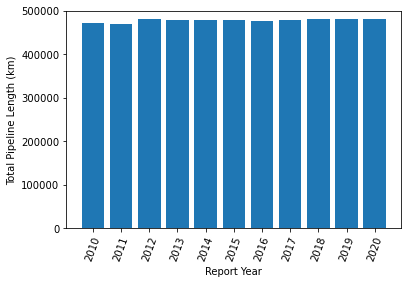

In [35]:
#bar graph
plt.bar(mileage_df.index,mileage_df['Total_km'])

#xticks 
plt.xticks(rotation=70) 
plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Report Year') 

#y-axis labels 
plt.ylabel('Total Pipeline Length (km)') 
plt.ylim(top = 500000)
#plt.yticks(np.arange(0, 550000, 50000))

#plot title 
#plt.title('Total Length of Pipelines Reported') 

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\Total_km'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

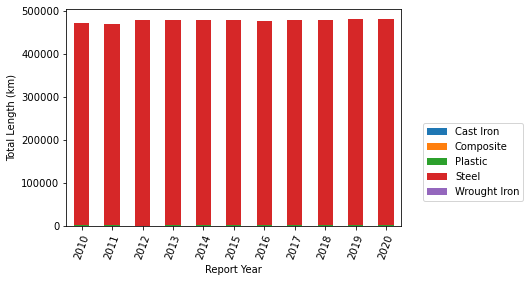

In [36]:
#bar graph
length_material.plot(kind= 'bar',stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 
#plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Report Year') 

#y-axis labels 
plt.ylabel('Total Length (km)') 
#plt.ylim([0, 500000])
#plt.yticks(np.arange(0, 550000, 50000)) 

#Legend
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\Total_km_by_Material'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

In [37]:
length_cp = pd.pivot_table(data=mileage_df,index = mileage_df.index, values= ['cpb', 'cpc', 'cub', 'cuc'])
length_cp

,cpb,cpc,cub,cuc
2010,10414,456187,1976,649
2011,13069,453462,1820,226
2012,9620,465977,1675,941
2013,9184,466371,1353,873
2014,7901,466951,1208,903
...,...,...,...,...
2016,6929,467249,1002,378
2017,6451,468584,974,339
2018,6224,470574,851,303
2019,5658,471753,673,426


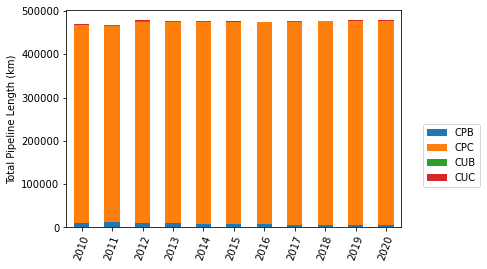

In [43]:
# plot a Stacked Bar Chart using matplotlib
length_cp.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#y-axis labels 
plt.ylabel('Total Pipeline Length (km)') 

#Legend
plt.legend(['CPB', 'CPC', 'CUB', 'CUC'], bbox_to_anchor=(1.05, 0.5), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\Coating'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

In [299]:
df_installation

,PARTJTONUNKWN,PARTJTONPRE1940,PARTJTON194049,PARTJTON195059,PARTJTON196069,PARTJTON197079,PARTJTON198089,PARTJTON199099,PARTJTON200009,PARTJTON201019,PARTJTON202029,PARTJTONTOTAL
2010,27729,0,36457,112185,114933,48446,42089,50353,46384,3201,0,481776
2011,24046,0,36325,112075,114620,49003,41519,49878,46847,8072,0,482385
2012,6973,16325,35472,110585,114570,48332,40930,48675,47643,11081,0,480587
2013,4752,15829,34999,109105,114561,49037,41160,49013,47748,14006,0,480210
2014,4447,15919,34601,107653,113848,48956,41097,48558,47401,16944,0,479424
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,4814,15050,34048,107011,111713,48430,40568,47959,46489,21981,0,478062
2017,5034,14570,33553,106161,110953,48107,40257,47631,45919,26721,0,478904
2018,4033,14125,32954,105599,110465,47859,40087,47448,46165,31685,0,480421
2019,3290,13748,32907,104547,109744,47639,39542,47690,46264,35672,0,481043


In [39]:
percent_installation = df_installation[df_installation.columns[:]].div(df_installation['PARTJTONTOTAL'], 0)*100
percent_installation = percent_installation.drop('PARTJTONTOTAL', axis = 1)
percent_installation

,PARTJTONUNKWN,PARTJTONPRE1940,PARTJTON194049,PARTJTON195059,PARTJTON196069,PARTJTON197079,PARTJTON198089,PARTJTON199099,PARTJTON200009,PARTJTON201019,PARTJTON202029
2010,5.755579,0.000000,7.567210,23.285718,23.856107,10.055711,8.736218,10.451538,9.627711,0.664417,0.000000
2011,4.984815,0.000000,7.530292,23.233517,23.761104,10.158483,8.607026,10.339874,9.711537,1.673352,0.000000
2012,1.450934,3.396888,7.380974,23.010402,23.839596,10.056868,8.516668,10.128239,9.913502,2.305722,0.000000
2013,0.989567,3.296266,7.288270,22.720268,23.856438,10.211574,8.571250,10.206576,9.943150,2.916641,0.000000
2014,0.927571,3.320443,7.217202,22.454654,23.746830,10.211420,8.572162,10.128404,9.887073,3.534241,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2016,1.006982,3.148127,7.122089,22.384335,23.367890,10.130485,8.485929,10.031962,9.724471,4.597939,0.000000
2017,1.051150,3.042363,7.006206,22.167491,23.168109,10.045228,8.406069,9.945835,9.588352,5.579615,0.000000
2018,0.839472,2.940130,6.859400,21.980513,22.993375,9.961888,8.344140,9.876338,9.609280,6.595257,0.000000
2019,0.683931,2.857957,6.840761,21.733400,22.813761,9.903273,8.220055,9.913875,9.617435,7.415553,0.000000


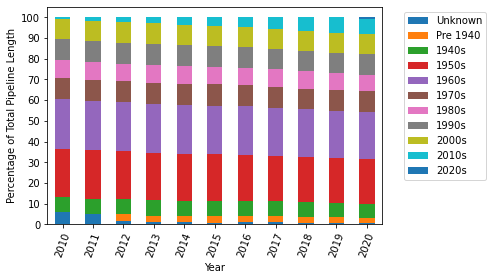

In [40]:
#Stacked bar graph
percent_installation.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 
#plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Pipeline Length') 
#plt.ylim([0, 500000])
plt.yticks(np.arange(0, 110, 10))

#plot title 
#plt.title('Ditribution of Pipeline Length based on Year of Installation') 

#Legend
plt.legend(['Unknown', 'Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'], bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\installation'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

In [346]:
df_commodity

,Propane Gas,Synthetic Gas,Landfill Gas,Natural Gas,Hydrogen Gas,Other
2010,0,286,153,467135,2169,1982
2011,0,319,170,466639,2144,1950
2012,0,157,473,475766,2409,1731
2013,0,146,528,475239,2473,1909
2014,0,207,555,474374,2487,2034
...,...,...,...,...,...,...
2016,0,207,582,472908,2570,1993
2017,0,205,609,473912,2390,1821
2018,0,205,506,475529,2389,1832
2019,0,205,472,476002,2450,1948


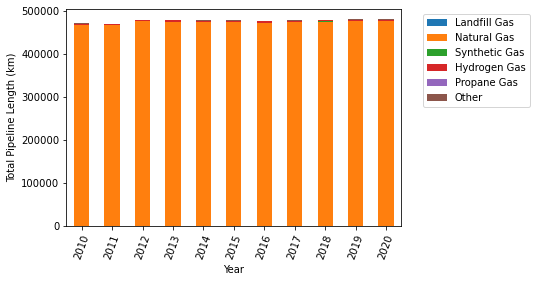

In [44]:
#Stacked bar graph
df_commodity.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 
#plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Total Pipeline Length (km)') 

#plot title 
#plt.title('Total Pipeline Length Breakdown by Commodity Transported') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\commodity'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

In [45]:
# No percent graph needed. The percentages are too low
percent_commodity = df_commodity[df_commodity.columns[:]].div(mileage_df['Total_km'], 0)*100
percent_commodity

,Landfill Gas,Natural Gas,Synthetic Gas,Hydrogen Gas,Propane Gas,Other
2010,0.032445,99.059315,0.060648,0.459952,0.0,0.420297
2011,0.036088,99.059796,0.067718,0.455136,0.0,0.413953
2012,0.098438,99.013746,0.032674,0.501348,0.0,0.360246
2013,0.109956,98.968744,0.030405,0.515003,0.0,0.397550
2014,0.115763,98.946240,0.043177,0.518745,0.0,0.424257
...,...,...,...,...,...,...
2016,0.121739,98.920242,0.043299,0.537578,0.0,0.416885
2017,0.127164,98.956793,0.042806,0.499052,0.0,0.380240
2018,0.105322,98.979254,0.042670,0.497260,0.0,0.381323
2019,0.098119,98.951040,0.042615,0.509305,0.0,0.404949


In [349]:
df_class

,PARTLTONC1,PARTLTONC2,PARTLTONC3,PARTLTONC4
2010,376657,48585,54531,2197
2011,377386,48265,54590,2214
2012,376927,49259,52809,1546
2013,375637,49130,53902,1533
2014,374460,49313,54166,1461
...,...,...,...,...
2016,373791,48284,54482,1492
2017,374624,48807,53976,1500
2018,376532,48326,54035,1350
2019,376892,48698,54096,1358


In [46]:
percent_class = df_class[df_class.columns[:]].div(mileage_df['Total_km'], 0)*100
percent_class

,PARTLTONC1,PARTLTONC2,PARTLTONC3,PARTLTONC4
2010,79.872808,10.302796,11.563688,0.465890
2011,80.112850,10.245867,11.588560,0.469996
2012,78.443929,10.251506,10.990312,0.321745
2013,78.226581,10.231345,11.225117,0.319248
2014,78.105902,10.285842,11.298094,0.304739
...,...,...,...,...
2016,78.187504,10.099776,11.396239,0.312088
2017,78.224628,10.191310,11.270641,0.313213
2018,78.373467,10.058843,11.247146,0.280997
2019,78.348107,10.123314,11.245447,0.282300


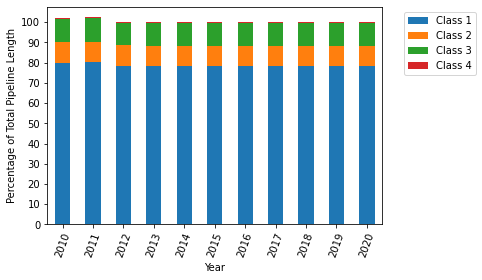

In [47]:
#Stacked bar graph
percent_class.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 
#plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Pipeline Length') 
#plt.ylim([0, 500000])
plt.yticks(np.arange(0, 110, 10))

#plot title 
#plt.title('Ditribution of Pipeline Length by Location Class') 

#Legend
plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4'], bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\class'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

In [356]:
df_smys

,PARTK20LESSTOT,PARTK2029TOT,PARTK3040TOT,PARTK4150TOT,PARTK5160TOT,PARTK6172TOT,PARTK7380TOT,PARTK80MORETOT,PARTKUNKNOWNTOT,PARTKNONSTEELTOT
2010,33445,43655,50732,71730,70622,173937,17853,2530,11078,1910
2011,30952,44219,51296,71113,73031,179986,18803,2229,8925,1817
2012,30919,46427,51957,74203,74338,167647,19157,2099,11695,2134
2013,30330,45926,51145,75650,75317,169461,19247,1971,8915,2241
2014,30149,44948,51357,75259,76976,170885,16165,2039,8927,2729
...,...,...,...,...,...,...,...,...,...,...
2016,33112,42683,50984,77448,74305,173921,14949,807,7446,2414
2017,32293,43268,51072,78464,74102,175465,13370,782,7680,2411
2018,31852,43351,51557,79272,75199,173785,15998,734,6320,2342
2019,32967,43452,51581,79221,76241,174787,15529,736,4097,2433


In [48]:
# Should none steel pipes be included??? PARTKNONSTEELTOT is for none steel pipes. Currently percentages are calculated based on total pipe length
percent_smys = df_smys[df_smys.columns[:]].div(mileage_df['Total_km'], 0)*100
#percent_smys = percent_smys.drop(['PARTKNONSTEELTOT'], 1)
percent_smys

,PARTK20LESSTOT,PARTK2029TOT,PARTK3040TOT,PARTK4150TOT,PARTK5160TOT,PARTK6172TOT,PARTK7380TOT,PARTK80MORETOT,PARTKUNKNOWNTOT,PARTKNONSTEELTOT
2010,7.092251,9.257355,10.758083,15.210859,14.975900,36.884584,3.785856,0.536505,2.349169,0.405029
2011,6.570601,9.386967,10.889298,15.096122,15.503282,38.208072,3.991568,0.473180,1.894631,0.385719
2012,6.434689,9.662126,10.812999,15.442711,15.470807,34.889751,3.986847,0.436832,2.433898,0.444116
2013,6.316237,9.564111,10.650970,15.754148,15.684800,35.290332,4.008197,0.410462,1.856553,0.466689
2014,6.288562,9.375378,10.712185,15.697730,16.055867,35.643666,3.371740,0.425300,1.862018,0.569222
...,...,...,...,...,...,...,...,...,...,...
2016,6.926182,8.928190,10.664547,16.200138,15.542703,36.379819,3.126948,0.168804,1.557512,0.504947
2017,6.743049,9.034721,10.664261,16.383940,15.473118,36.638561,2.791768,0.163288,1.603648,0.503437
2018,6.629853,9.023319,10.731361,16.500116,15.652339,36.172578,3.329913,0.152779,1.315480,0.487477
2019,6.853162,9.032778,10.722631,16.468419,15.848938,36.334628,3.228160,0.152999,0.851682,0.505771


In [49]:
percent_smys['PARTK20LESSTOT']

2010    7.092251
2011    6.570601
2012    6.434689
2013    6.316237
2014    6.288562
          ...   
2016    6.926182
2017    6.743049
2018    6.629853
2019    6.853162
2020    6.883716
Name: PARTK20LESSTOT, Length: 11, dtype: float64

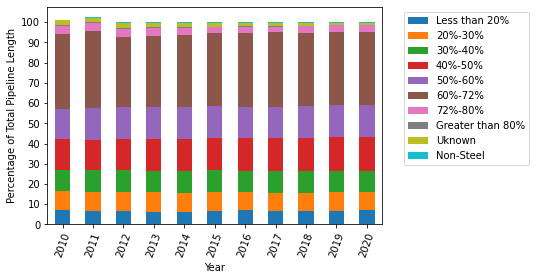

In [50]:
#Stacked bar graph
percent_smys.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 
#plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Pipeline Length') 
#plt.ylim([0, 500000])
plt.yticks(np.arange(0, 110, 10))

#plot title 
#plt.title('Ditribution of Pipeline Length by SMYS') 

#Legend
plt.legend(['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Uknown', 'Non-Steel'], bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\smys'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

In [364]:
df_diameter

,PARTHON4LESS,PARTHON6,PARTHON8,PARTHON10,PARTHON12,PARTHON14,PARTHON16,PARTHON18,PARTHON20,PARTHON22,...,PARTHON44,PARTHON46,PARTHON48,PARTHON50,PARTHON52,PARTHON54,PARTHON56,PARTHON58OVER,PARTHON_OTHER_PIPE_MILE_TOTAL,PARTHONTOTAL
2010,37251,36564,41558,26793,42764,4240,41812,7945,39846,8416,...,0,0,121,0,0,0,3,0,1720,481789
2011,36341,36367,40726,27020,43963,4104,38422,7739,41182,8043,...,0,0,121,0,0,0,0,0,1780,482391
2012,35704,36429,40381,26321,44369,4129,38670,7872,41412,7837,...,0,0,121,0,0,0,0,0,773,480639
2013,35194,36009,40513,26269,44645,3946,38868,7813,41552,7751,...,0,0,121,0,0,0,0,0,770,480217
2014,35015,35500,40199,26392,44393,3858,38897,7741,41401,7375,...,0,0,124,0,0,0,0,0,763,479468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,34896,35454,40143,26113,43977,3787,38590,7481,40974,7350,...,0,0,124,0,0,0,0,0,1006,478080
2017,34490,35127,39759,25678,43774,3865,38193,7292,41070,7280,...,4,0,131,0,0,0,0,0,1039,478925
2018,34245,34867,39205,25452,43862,3790,38439,7299,41324,7378,...,0,0,388,0,0,0,0,0,1062,480417
2019,34023,34644,39098,25332,44014,3724,38131,7337,41524,7248,...,0,0,389,0,0,0,0,0,1063,481041


In [51]:
percent_diameter = df_diameter[df_diameter.columns[:]].div(mileage_df['Total_km'], 0)*100
percent_diameter = percent_diameter.drop(['PARTHONTOTAL'], 1)
percent_diameter

,PARTHON4LESS,PARTHON6,PARTHON8,PARTHON10,PARTHON12,PARTHON14,PARTHON16,PARTHON18,PARTHON20,PARTHON22,...,PARTHON42,PARTHON44,PARTHON46,PARTHON48,PARTHON50,PARTHON52,PARTHON54,PARTHON56,PARTHON58OVER,PARTHON_OTHER_PIPE_MILE_TOTAL
2010,7.899341,7.753657,8.812671,5.681647,9.068412,0.899122,8.866533,1.684794,8.449629,1.784673,...,2.813362,0.000000,0.0,0.025659,0.0,0.0,0.0,0.000636,0.0,0.364738
2011,7.714597,7.720117,8.645461,5.735902,9.332623,0.871212,8.156360,1.642863,8.742262,1.707397,...,3.152623,0.000000,0.0,0.025686,0.0,0.0,0.0,0.000000,0.0,0.377865
2012,7.430516,7.581399,8.403867,5.477779,9.233827,0.859304,8.047783,1.638276,8.618433,1.630992,...,3.114224,0.000000,0.0,0.025182,0.0,0.0,0.0,0.000000,0.0,0.160872
2013,7.329167,7.498891,8.436851,5.470532,9.297342,0.821756,8.094279,1.627061,8.653223,1.614149,...,3.119592,0.000000,0.0,0.025198,0.0,0.0,0.0,0.000000,0.0,0.160353
2014,7.303525,7.404688,8.384819,5.504916,9.259615,0.804712,8.113244,1.614639,8.635535,1.538298,...,3.168581,0.000000,0.0,0.025864,0.0,0.0,0.0,0.000000,0.0,0.159149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,7.299349,7.416069,8.396887,5.462171,9.198862,0.792143,8.072040,1.564834,8.570711,1.537432,...,3.194511,0.000000,0.0,0.025938,0.0,0.0,0.0,0.000000,0.0,0.210429
2017,7.201801,7.334812,8.302012,5.361781,9.140378,0.807044,7.975018,1.522631,8.575760,1.520125,...,3.425919,0.000835,0.0,0.027354,0.0,0.0,0.0,0.000000,0.0,0.216952
2018,7.127945,7.257412,8.160347,5.297721,9.129681,0.788872,8.000908,1.519255,8.601407,1.535698,...,3.544095,0.000000,0.0,0.080760,0.0,0.0,0.0,0.000000,0.0,0.221051
2019,7.072683,7.201776,8.127671,5.266003,9.149607,0.774143,7.926652,1.525212,8.631987,1.506710,...,3.658263,0.000000,0.0,0.080865,0.0,0.0,0.0,0.000000,0.0,0.220976


In [52]:
percent_diameter_short = pd.DataFrame()
percent_diameter_short['d<=4'] = percent_diameter['PARTHON4LESS']
percent_diameter_short['4<d<=10'] = percent_diameter['PARTHON6'] + percent_diameter['PARTHON8'] + percent_diameter['PARTHON10']
percent_diameter_short['10<d<=20'] = percent_diameter['PARTHON12'] + percent_diameter['PARTHON14'] + percent_diameter['PARTHON16'] + percent_diameter['PARTHON18']+ percent_diameter['PARTHON20']
percent_diameter_short['20<d<=28'] = percent_diameter['PARTHON22'] + percent_diameter['PARTHON24'] + percent_diameter['PARTHON26']+ percent_diameter['PARTHON28']
percent_diameter_short['28<d'] = percent_diameter['PARTHON30'] + percent_diameter['PARTHON32'] + percent_diameter['PARTHON34']+ percent_diameter['PARTHON36']+ percent_diameter['PARTHON38']+ percent_diameter['PARTHON40']+ percent_diameter['PARTHON42']+ percent_diameter['PARTHON44']+ percent_diameter['PARTHON46']+ percent_diameter['PARTHON48']+ percent_diameter['PARTHON50']+ percent_diameter['PARTHON52']+ percent_diameter['PARTHON54']+ percent_diameter['PARTHON56']+ percent_diameter['PARTHON58OVER']
percent_diameter_short

,d<=4,4<d<=10,10<d<=20,20<d<=28,28<d
2010,7.899341,22.247975,28.968490,16.994684,25.691147
2011,7.714597,22.101480,28.745319,16.472569,26.991857
2012,7.430516,21.463044,28.397623,16.182974,26.392233
2013,7.329167,21.406274,28.493662,16.072771,26.543188
2014,7.303525,21.294423,28.427745,16.119067,26.704643
...,...,...,...,...,...
2016,7.299349,21.275127,28.198590,16.142406,26.875981
2017,7.201801,20.998605,28.020831,16.191628,27.373734
2018,7.127945,20.715480,28.040122,16.156259,27.735605
2019,7.072683,20.595450,28.007600,16.138722,27.962906


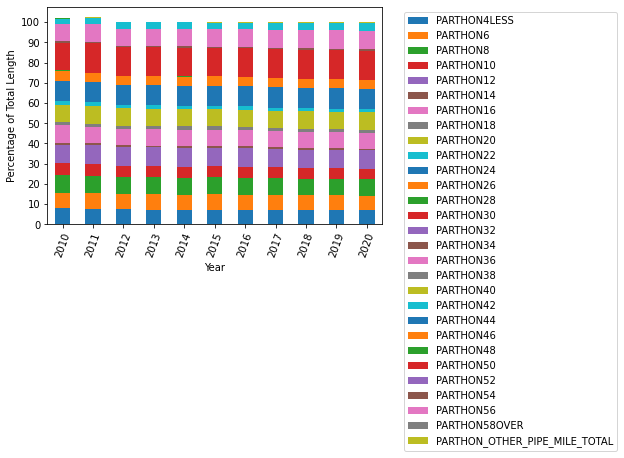

In [53]:
#Stacked bar graph
percent_diameter.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 
#plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Length') 
#plt.ylim([0, 500000])
plt.yticks(np.arange(0, 110, 10))

#plot title 
#plt.title('Ditribution of Pipeline Length by Pipe Size') 

#Legend
#plt.legend(['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Uknown', 'Non-Steel'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#save plot 
plot_path = os.getcwd() + '\\GT Plots\\diameter'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();


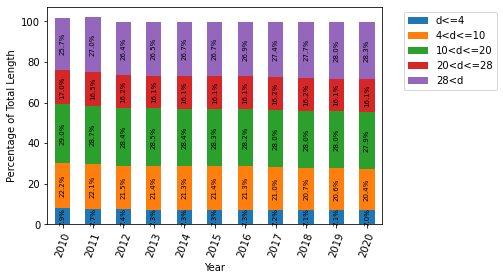

In [54]:
#Stacked bar graph
percent_diameter_short.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 
#plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Length') 
#plt.ylim([0, 500000])
#plt.yticks(np.arange(0, 110, 10))

#plot title 
#plt.title('Ditribution of Pipeline Length by Pipe Size') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
for n in percent_diameter_short:
    for i, (cs, ab, pc) in enumerate(zip(percent_diameter_short.cumsum(1)[n], percent_diameter_short[n], percent_diameter_short[n])):
        plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\diameter_short'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [55]:
df_smys_class_1 = pd.pivot_table(data=df_smys_class,index=df_smys_class.index,values=['PARTK20LESSC1','PARTK2029C1','PARTK3040C1','PARTK4150C1', 'PARTK5160C1', 'PARTK6172C1', 'PARTK7380C1', 'PARTK80MOREC1', 'PARTKUNKNOWNC1', 'PARTKNONSTEELC1'])
df_smys_class_2 = pd.pivot_table(data=df_smys_class,index=df_smys_class.index,values=[smys for smys in pipe_smys_cat_on if smys.endswith('C2')])
df_smys_class_3 = pd.pivot_table(data=df_smys_class,index=df_smys_class.index,values=[smys for smys in pipe_smys_cat_on if smys.endswith('C3')])
df_smys_class_4 = pd.pivot_table(data=df_smys_class,index=df_smys_class.index,values=[smys for smys in pipe_smys_cat_on if smys.endswith('C4')])

In [56]:
df_smys_class_1_percent = df_smys_class_1[df_smys_class_1.columns[:]].div(df_smys_class_1.sum(1), 0)*100
df_smys_class_2_percent = df_smys_class_2[df_smys_class_2.columns[:]].div(df_smys_class_2.sum(1), 0)*100
df_smys_class_3_percent = df_smys_class_3[df_smys_class_3.columns[:]].div(df_smys_class_3.sum(1), 0)*100
df_smys_class_4_percent = df_smys_class_4[df_smys_class_4.columns[:]].div(df_smys_class_4.sum(1), 0)*100

In [57]:
df_smys_class_1_percent = df_smys_class_1_percent[[smys for smys in pipe_smys_cat_on if smys.endswith('C1')]]
df_smys_class_2_percent = df_smys_class_2_percent[[smys for smys in pipe_smys_cat_on if smys.endswith('C2')]]
df_smys_class_3_percent = df_smys_class_3_percent[[smys for smys in pipe_smys_cat_on if smys.endswith('C3')]]
df_smys_class_4_percent = df_smys_class_4_percent[[smys for smys in pipe_smys_cat_on if smys.endswith('C4')]]

In [58]:
df_smys_class_percent = pd.concat([df_smys_class_1_percent, df_smys_class_2_percent, df_smys_class_3_percent, df_smys_class_4_percent], axis = 1)

In [494]:
df_smys_class_percent.to_csv('smys_class_percent_df_gt.csv')

In [59]:
df_smys_class_percent_average = pd.DataFrame(df_smys_class_percent.mean(0), columns = ['percentage'])
df_smys_class_percent_average

,percentage
PARTK20LESSC1,5.805434
PARTK2029C1,6.904698
PARTK3040C1,8.744552
PARTK4150C1,12.769864
PARTK5160C1,15.617636
...,...
PARTK6172C4,0.340024
PARTK7380C4,0.241398
PARTK80MOREC4,0.000000
PARTKUNKNOWNC4,0.636833


In [496]:
df_smys_class_percent_average.to_csv('smys_class_percent_df_gt_average.csv')

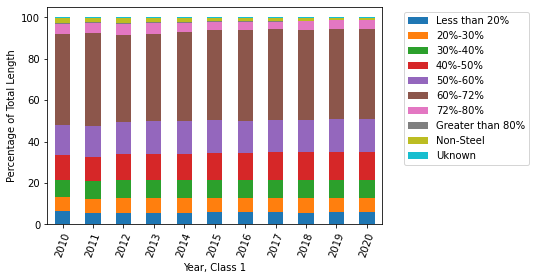

In [64]:
#Stacked bar graph
df_smys_class_1_percent.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year, Class 1') 


#y-axis labels 
plt.ylabel('Percentage of Total Length') 


#plot title 
#plt.title('Ditribution of Class 1 Pipeline Length by SMYS%') 

#Legend
plt.legend(['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%','Non-Steel', 'Uknown'], bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#for n in df_smys_class_1_percent:
    #for i, (cs, ab, pc) in enumerate(zip(df_smys_class_1_percent.cumsum(1)[n], df_smys_class_1_percent[n], df_smys_class_1_percent[n])):
        #plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 #va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\GT Plots\\smys_class_1'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

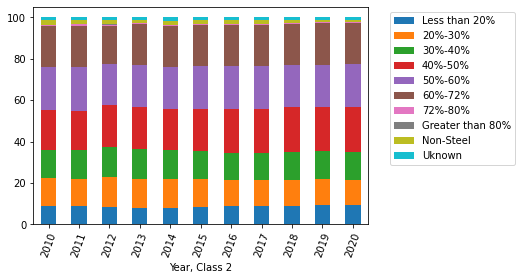

In [65]:
#Stacked bar graph
df_smys_class_2_percent.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year, Class 2') 


#y-axis labels 
#plt.ylabel('Percentage of Total Length') 


#plot title 
#plt.title('Ditribution of Class 2 Pipeline Length by SMYS%') 

#Legend
plt.legend(['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%','Non-Steel', 'Uknown'], bbox_to_anchor=(1.05, 1), loc='upper left')


#save plot 
plot_path = os.getcwd() + '\\GT Plots\\smys_class_2'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

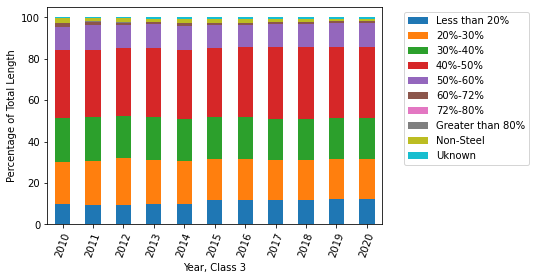

In [66]:
#Stacked bar graph
df_smys_class_3_percent.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year, Class 3') 


#y-axis labels 
plt.ylabel('Percentage of Total Length') 


#plot title 
#plt.title('Ditribution of Class 3 Pipeline Length by SMYS%') 

#Legend
plt.legend(['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%','Non-Steel', 'Uknown'], bbox_to_anchor=(1.05, 1), loc='upper left')


#save plot 
plot_path = os.getcwd() + '\\GT Plots\\smys_class_3'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

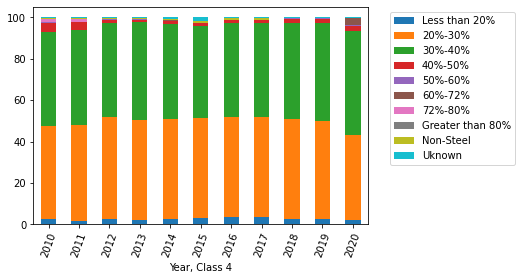

In [67]:
#Stacked bar graph
df_smys_class_4_percent.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year, Class 4') 


#y-axis labels 
#plt.ylabel('Percentage of Total Length') 


#plot title 
#plt.title('Ditribution of Class 4 Pipeline Length by SMYS%') 

#Legend
plt.legend(['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%','Non-Steel', 'Uknown'], bbox_to_anchor=(1.05, 1), loc='upper left')


#save plot 
plot_path = os.getcwd() + '\\GT Plots\\smys_class_4'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();